In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.datasets import load_wine

In [5]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [9]:
X=df.drop('target',axis=1)
y=df['target']

In [10]:
df['target'].value_counts(normalize=True)

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

In [11]:
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
lr=LogisticRegression(multi_class='ovr')
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)

/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kshitizgupta/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion_matrix_basic 
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]



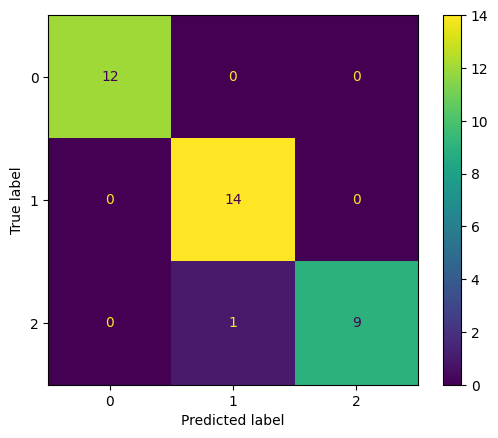

In [14]:
print('confusion_matrix_basic \n',confusion_matrix(y_test,y_pred))
print()
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

In [15]:
#1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

# alcohol	Alcohol content (%)	 High: Influences body, warmth — varies across wine types.
# malic_acid	Organic acid	 Moderate: Impacts sharpness and taste.
# ash	Mineral content after burning	 Low to moderate: Related to flavor; subtle differences.
# alcalinity_of_ash	Alkalinity of ash	 Moderate: Associated with buffering capacity.
# magnesium	Mineral component	 Moderate: Affects fermentation and taste.
# total_phenols	Total phenolic compounds	 High: Affects bitterness, astringency.
# flavanoids	Subgroup of phenols	 Very high: Strongly differentiates classes; antioxidant effect.
# nonflavanoid_phenols	Other phenols	 Moderate: Some influence, less than flavonoids.
# proanthocyanins	Type of tannin	 High: Contributes to mouthfeel and color.
# color_intensity	Depth of wine color	 High: Strongly varies across types.
# hue	Color shade	 Moderate: Complementary to color intensity.
# OD280/OD315_of_diluted_wines	Optical density	 High: Measures phenolic content, good for distinguishing types.
# proline	Amino acid	 High: Indicator of grape ripeness and sweetness — often very predictive.

In [ ]:
#2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.
# Imputation of Mean, Median, and Mode
 # Substitute the mean (numerical), median (resistant to outliers), or mode (categorical) for any missing values.

#  Benefits: # Easy and quick # Good baseline

 # Drawbacks: # Underestimates variability # Distorts data distribution # Unsuitable for time-series or situations when data isn't randomly absent


 # Imputation Based on Models
 # Use a machine learning model (such as a decision tree or regression) to forecast missing data.

#  Benefits: # Capable of capturing non-linear interactions # Accurate

 # Drawbacks: # Overfitting risk # More intricate pipeline 

 # Drop Columns or Rows
 # You can simply eliminate missing data if it is minor.

#  Benefits: # Simple and tidy

 # Drawbacks: # May result in substantial data loss # Unsuitable for situations where data is limited

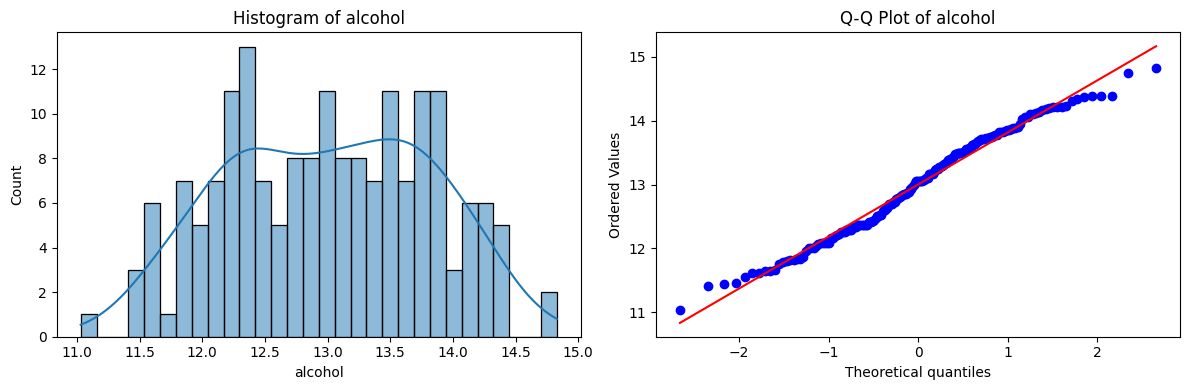

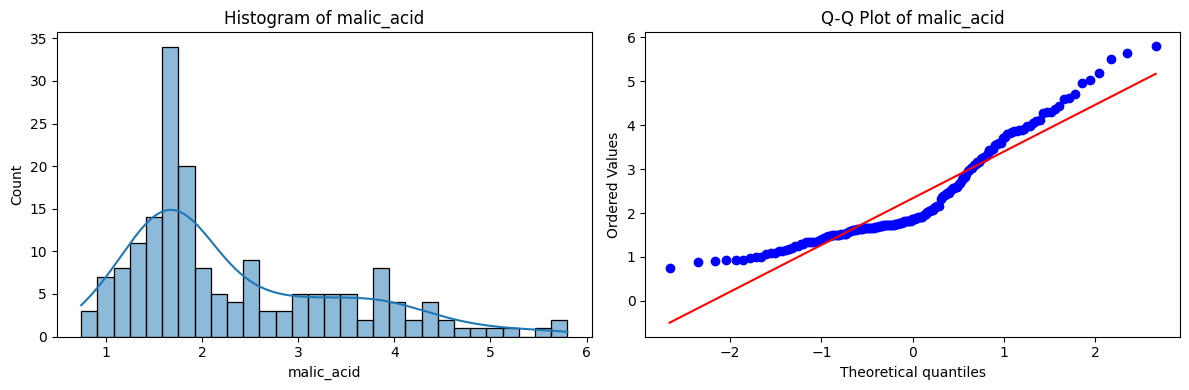

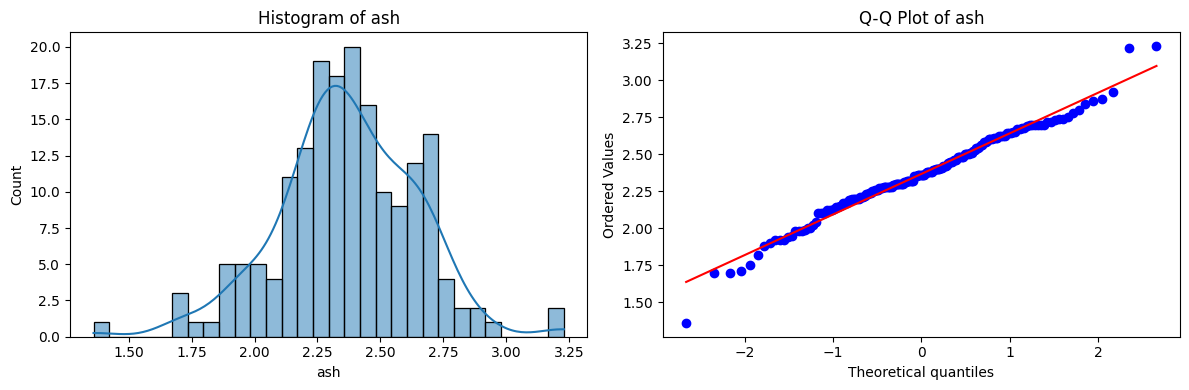

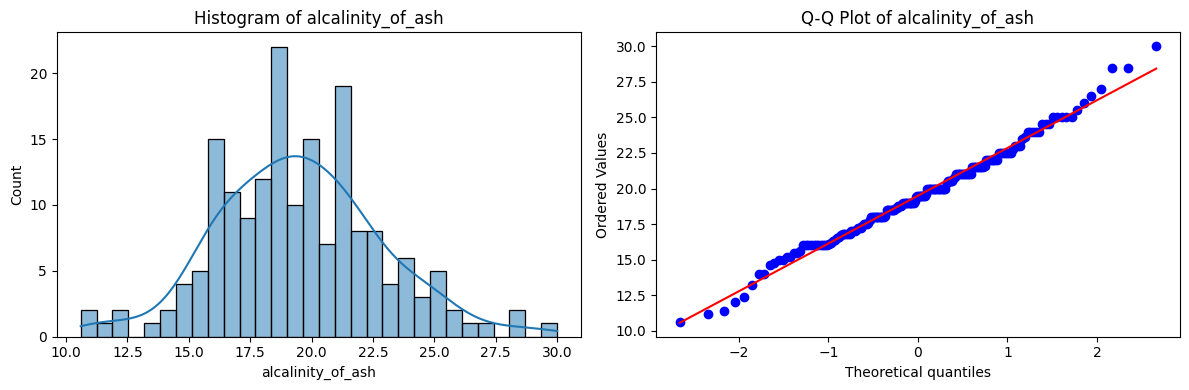

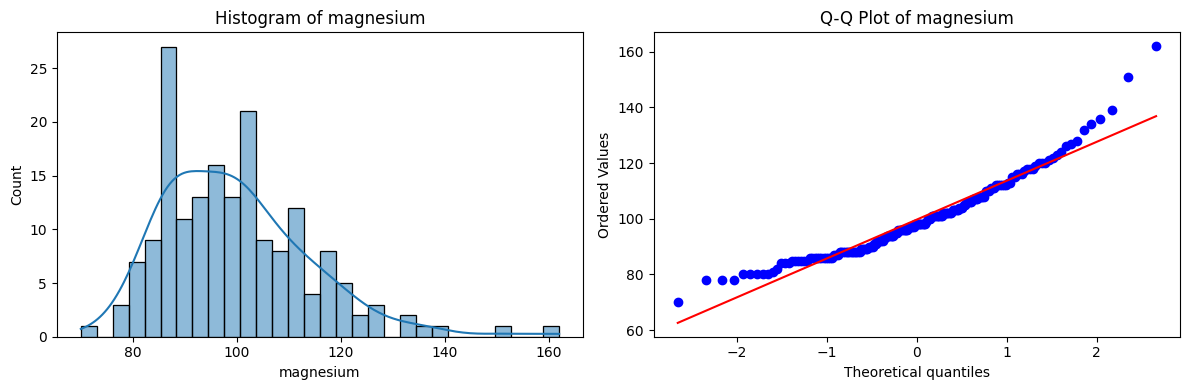

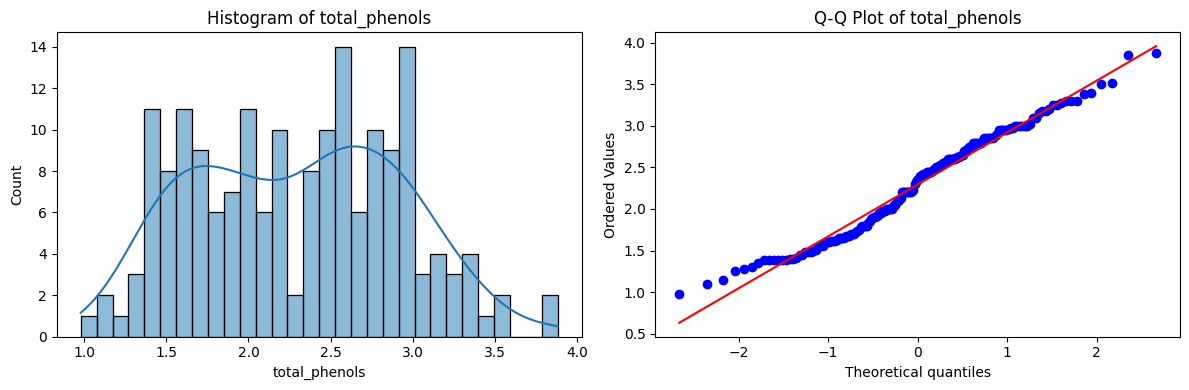

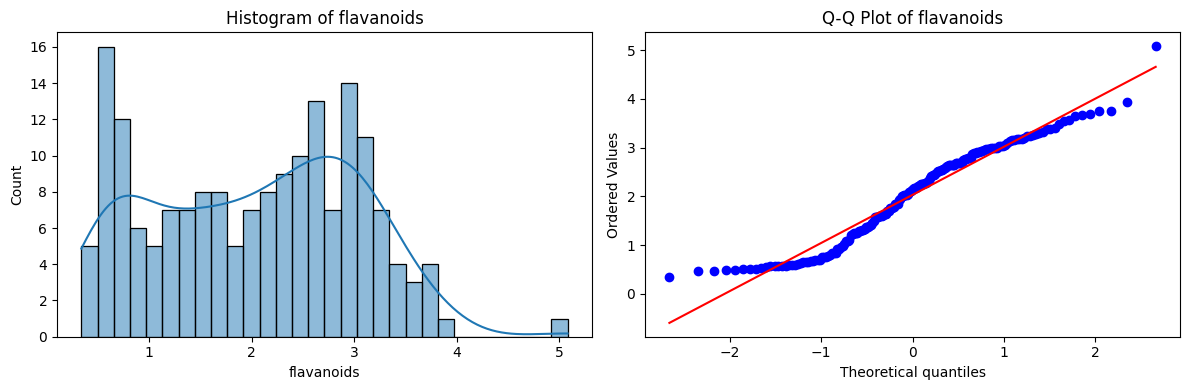

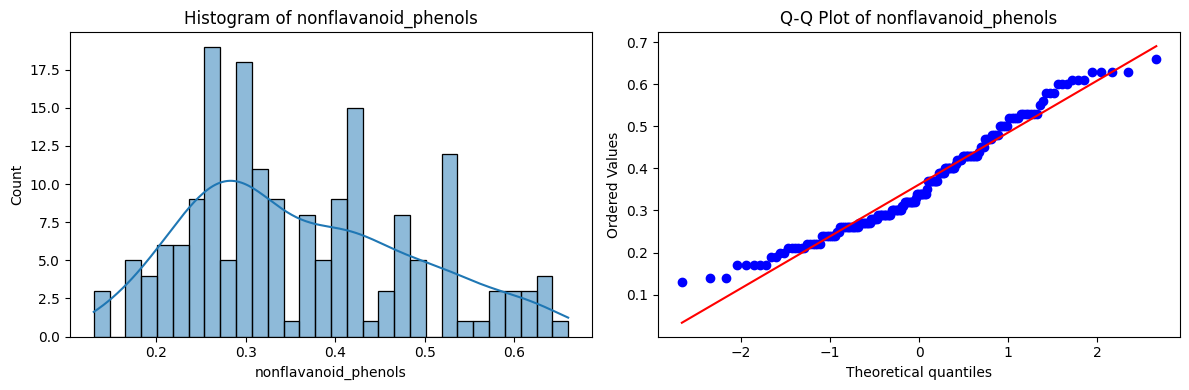

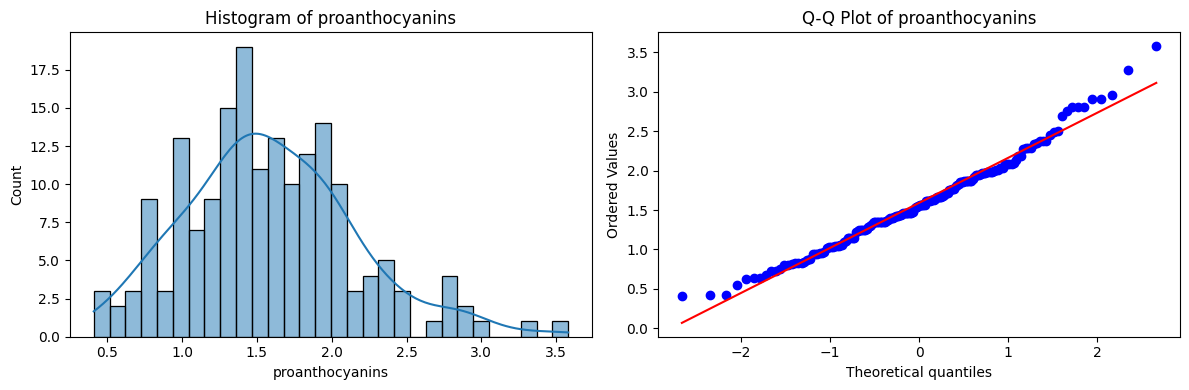

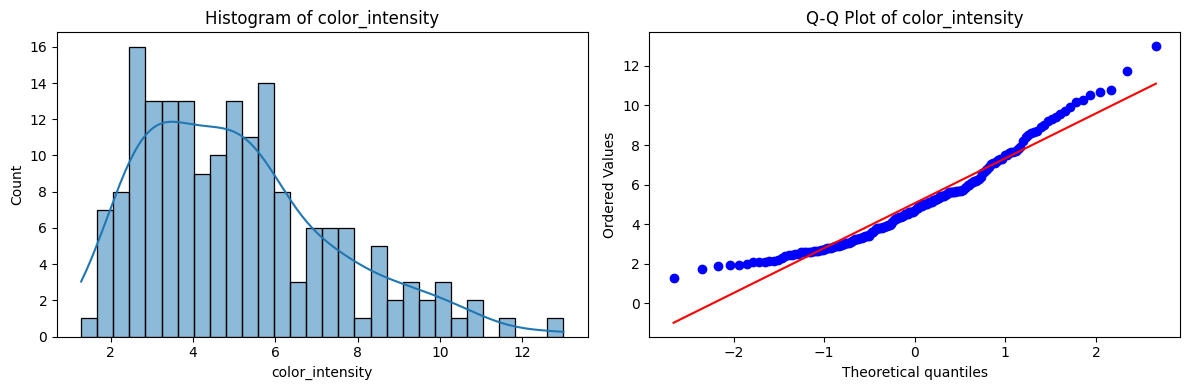

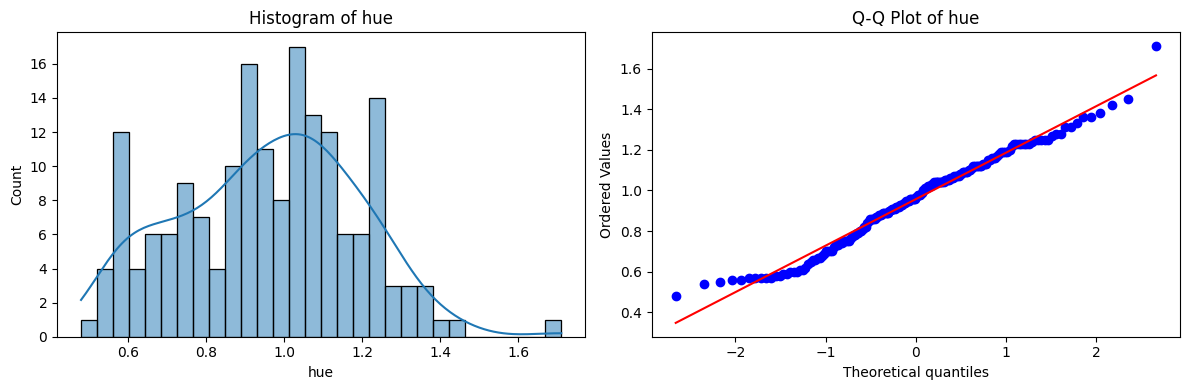

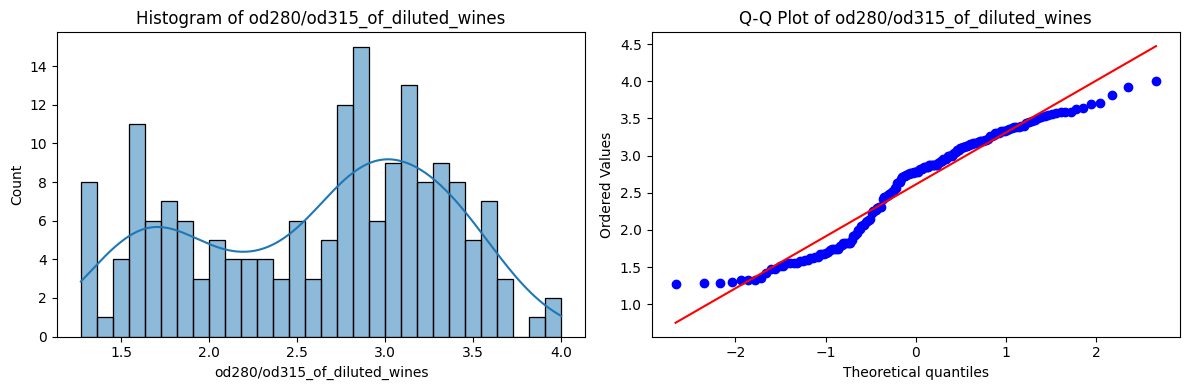

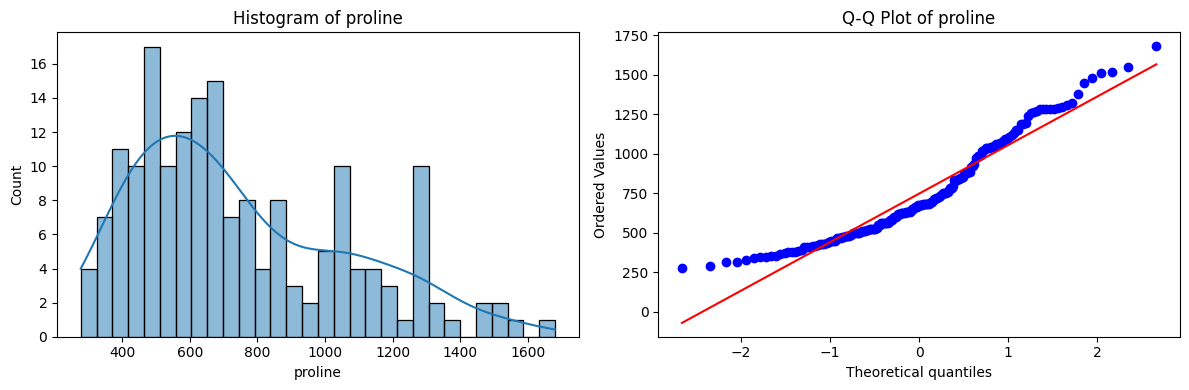

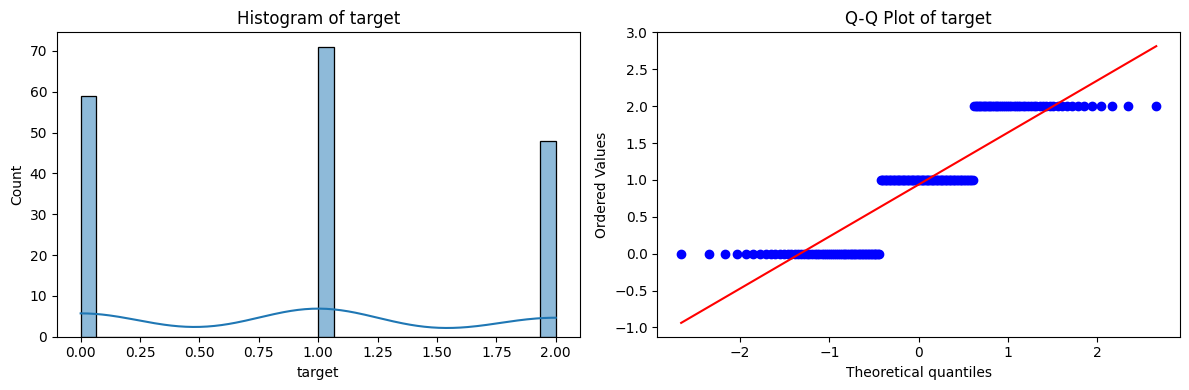

In [18]:
for col in df.columns:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")

    plt.tight_layout()
    plt.show()

In [19]:
# Example: log-transform
df['proline_log'] = np.log1p(df['proline'])  # log1p = log(1 + x)

# Box-Cox (only for positive data)
df['color_intensity_boxcox'], _ = stats.boxcox(df['color_intensity'])


In [ ]:
# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

# Feature	Skewed?	Suggested Transformation
# proline	Yes (right)	np.log1p() or Box-Cox
# color_intensity	Yes (right)	Box-Cox or np.log1p()
# malic_acid	Mild (right)	np.sqrt() or Box-Cox
# nonflavanoid_phenols	Slight	np.sqrt()
# alcohol, flavanoids	Nearly normal	None needed
